# Fizz Buzz in Tensorflow 
## [@joelgrus](http://twitter.com/joelgrus)
### http://github.com/joelgrus

------------------------


**interviewer:** Welcome, can I get you coffee or anything? Do you need a break?

**me:** No, I've probably had too much coffee already!

**interviewer:** Great, great. And are you OK with writing code on the whiteboard?

**me:** It's the only way I code!

**interviewer:** ...

**me:** That was a joke.

**interviewer:** OK, so are you familiar with "fizz buzz"?

**me:** ...

**interviewer:** Is that a yes or a no?

**me:** It's more of a "I can't believe you're asking me that."

**interviewer:** OK, so I need you to print the numbers from 1 to 100, except that if the number is divisible by 3 print "fizz", if it's divisible by 5 print "buzz", and if it's divisible by 15 print "fizzbuzz".

**me:** I'm familiar with it.

**interviewer:** Great, we find that candidates who can't get this right don't do well here.

**me:** ...

**interviewer:** Here's a marker and an eraser.

**me:** [thinks for a couple of minutes]

**interviewer:** Do you need help getting started?

**me:** No, no, I'm good. So let's start with some standard imports:

In [93]:
import numpy as np
import tensorflow as tf

**interviewer**: Um, you understand the problem is *fizzbuzz*, right?

**me:** Do I ever. So, now let's talk models. I'm thinking a simple multi-layer-perceptron with one hidden layer.

**interviewer:** Perceptron?

**me:** Or neural network, whatever you want to call it. We want the input to be a number, and the output to be the correct "fizzbuzz" representation of that number. In particular, we need to turn each input into a vector of "activations". One simple way would be to convert it to binary.

**interviewer:** Binary?

**me:** Yeah, you know, 0's and 1's? Something like:



In [94]:
def binary_encode(i, num_digits):
    return np.array([i >> d & 1 for d in range(num_digits)])

**interviewer:** [stares at whiteboard for a minute]

**me:** And our output will be a one-hot encoding of the fizzbuzz representation of the number, where the first position indicates "print as-is", the second indicates "fizz", and so on:

In [95]:
def fizz_buzz_encode(i):
    if   i % 15 == 0: return np.array([0, 0, 0, 1])
    elif i % 5  == 0: return np.array([0, 0, 1, 0])
    elif i % 3  == 0: return np.array([0, 1, 0, 0])
    else:             return np.array([1, 0, 0, 0])

**interviewer:** OK, that's probably enough.

**me:** That's enough setup, you're exactly right. Now we need to generate some training data. It would be cheating to use the numbers 1 to 100 in our training data, so let's train it on all the remaining numbers up to 1024:

In [111]:
NUM_DIGITS = 10
trX = np.array([binary_encode(i, NUM_DIGITS) for i in range(101, 2 ** NUM_DIGITS)])
trY = np.array([fizz_buzz_encode(i)          for i in range(101, 2 ** NUM_DIGITS)])

**interviewer:** ...

**me:** Now we need to set up our model in tensorflow. Off the top of my head I'm not sure how many hidden units to use, maybe 10?

**interviewer:** ...

**me:** Yeah, possibly 100 is better. We can always change it later.

In [126]:
NUM_HIDDEN = 100

We'll need an input variable with width NUM_DIGITS, and an output variable with width 4:



In [127]:
X = tf.placeholder("float", [None, NUM_DIGITS])
Y = tf.placeholder("float", [None, 4])

**interviewer:** How far are you intending to take this?

**me:** Oh, just two layers deep -- one hidden layer and one output layer. Let's use randomly-initialized weights for our neurons:

In [128]:
def init_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.01))

w_h = init_weights([NUM_DIGITS, NUM_HIDDEN])
w_o = init_weights([NUM_HIDDEN, 4])

And we're ready to define the model. As I said before, one hidden layer, and let's use, I don't know, ReLU activation:

In [129]:
def model(X, w_h, w_o):
    h = tf.nn.relu(tf.matmul(X, w_h))
    return tf.matmul(h, w_o)

We can use softmax cross-entropy as our cost function and try to minimize it:



In [130]:
py_x = model(X, w_h, w_o)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=py_x, labels=Y))
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost)

**interviewer:** ...

**me:** And, of course, the prediction will just be the largest output:

In [131]:
predict_op = tf.argmax(py_x, 1)


**interviewer:** Before you get too far astray, the problem you're supposed to be solving is to generate fizz buzz for the numbers from 1 to 100.

**me:** Oh, great point, the predict_op function will output a number from 0 to 3, but we want a "fizz buzz" output:

In [132]:
def fizz_buzz(i, prediction):
    return ["nothing", "fizz", "buzz", "fizzbuzz"][prediction]

**interviewer:** ...

**me:** So now we're ready to train the model. Let's grab a tensorflow session and initialize the variables:

Now let's run, say, 1000 epochs of training?

**interviewer:** ...

**me:** Yeah, maybe that's not enough -- so let's do 10000 just to be safe.


In [133]:
NUM_EPOCHS = 5000

And our training data are sequential, which I don't like, so let's shuffle them each iteration:


And each epoch we'll train in batches of, I don't know, 128 inputs?




In [134]:
BATCH_SIZE = 128


So each training pass looks like



and then we can print the accuracy on the training data, since why not?


interviewer: Are you serious?

me: Yeah, I find it helpful to see how the training accuracy evolves.

interviewer: ...

In [135]:
sess = tf.Session()
acc_data = []

with sess.as_default():
    tf.global_variables_initializer().run()
    
    for epoch in range(NUM_EPOCHS):
        p = np.random.permutation(range(len(trX)))
        trX, trY = trX[p], trY[p]
        
        for start in range(0, len(trX), BATCH_SIZE):
            end = start + BATCH_SIZE
            sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end]})
            
        accuracy = np.mean(np.argmax(trY, axis=1) ==
                           sess.run(predict_op, feed_dict={X: trX, Y: trY}))
        acc_data.append(accuracy)
        print(epoch, accuracy)

0 0.518959913326
1 0.534127843987
2 0.534127843987
3 0.534127843987
4 0.534127843987
5 0.534127843987
6 0.534127843987
7 0.534127843987
8 0.534127843987
9 0.534127843987
10 0.534127843987
11 0.534127843987
12 0.534127843987
13 0.534127843987
14 0.534127843987
15 0.534127843987
16 0.534127843987
17 0.534127843987
18 0.534127843987
19 0.534127843987
20 0.534127843987
21 0.534127843987
22 0.534127843987
23 0.534127843987
24 0.534127843987
25 0.534127843987
26 0.534127843987
27 0.534127843987
28 0.534127843987
29 0.534127843987
30 0.534127843987
31 0.534127843987
32 0.534127843987
33 0.534127843987
34 0.534127843987
35 0.534127843987
36 0.534127843987
37 0.534127843987
38 0.534127843987
39 0.534127843987
40 0.534127843987
41 0.534127843987
42 0.534127843987
43 0.534127843987
44 0.534127843987
45 0.534127843987
46 0.534127843987
47 0.534127843987
48 0.534127843987
49 0.534127843987
50 0.534127843987
51 0.534127843987
52 0.534127843987
53 0.534127843987
54 0.534127843987
55 0.534127843987
56

439 0.534127843987
440 0.534127843987
441 0.534127843987
442 0.534127843987
443 0.534127843987
444 0.534127843987
445 0.534127843987
446 0.534127843987
447 0.534127843987
448 0.534127843987
449 0.534127843987
450 0.534127843987
451 0.534127843987
452 0.534127843987
453 0.534127843987
454 0.534127843987
455 0.534127843987
456 0.534127843987
457 0.534127843987
458 0.534127843987
459 0.534127843987
460 0.534127843987
461 0.534127843987
462 0.534127843987
463 0.534127843987
464 0.534127843987
465 0.534127843987
466 0.534127843987
467 0.534127843987
468 0.534127843987
469 0.534127843987
470 0.534127843987
471 0.534127843987
472 0.534127843987
473 0.534127843987
474 0.534127843987
475 0.534127843987
476 0.534127843987
477 0.534127843987
478 0.534127843987
479 0.534127843987
480 0.534127843987
481 0.534127843987
482 0.534127843987
483 0.534127843987
484 0.534127843987
485 0.534127843987
486 0.534127843987
487 0.534127843987
488 0.534127843987
489 0.534127843987
490 0.534127843987
491 0.534127

879 0.699891657638
880 0.676056338028
881 0.638136511376
882 0.704225352113
883 0.640303358613
884 0.680390032503
885 0.667388949079
886 0.657638136511
887 0.702058504875
888 0.679306608884
889 0.69014084507
890 0.661971830986
891 0.677139761647
892 0.70639219935
893 0.683640303359
894 0.668472372698
895 0.678223185265
896 0.684723726977
897 0.703141928494
898 0.702058504875
899 0.692307692308
900 0.685807150596
901 0.707475622969
902 0.704225352113
903 0.702058504875
904 0.703141928494
905 0.673889490791
906 0.700975081257
907 0.703141928494
908 0.695557963164
909 0.703141928494
910 0.693391115926
911 0.70639219935
912 0.660888407367
913 0.703141928494
914 0.691224268689
915 0.704225352113
916 0.697724810401
917 0.697724810401
918 0.67497291441
919 0.624052004334
920 0.703141928494
921 0.660888407367
922 0.672806067172
923 0.677139761647
924 0.683640303359
925 0.70639219935
926 0.699891657638
927 0.70639219935
928 0.703141928494
929 0.659804983749
930 0.69880823402
931 0.696641386782


1300 0.741061755146
1301 0.768147345612
1302 0.762730227519
1303 0.768147345612
1304 0.765980498375
1305 0.768147345612
1306 0.763813651138
1307 0.772481040087
1308 0.772481040087
1309 0.765980498375
1310 0.765980498375
1311 0.772481040087
1312 0.763813651138
1313 0.768147345612
1314 0.715059588299
1315 0.767063921993
1316 0.764897074756
1317 0.768147345612
1318 0.768147345612
1319 0.775731310943
1320 0.768147345612
1321 0.772481040087
1322 0.778981581798
1323 0.767063921993
1324 0.764897074756
1325 0.771397616468
1326 0.772481040087
1327 0.760563380282
1328 0.771397616468
1329 0.770314192849
1330 0.775731310943
1331 0.77789815818
1332 0.772481040087
1333 0.762730227519
1334 0.773564463705
1335 0.769230769231
1336 0.770314192849
1337 0.770314192849
1338 0.765980498375
1339 0.769230769231
1340 0.778981581798
1341 0.771397616468
1342 0.757313109426
1343 0.776814734561
1344 0.776814734561
1345 0.77789815818
1346 0.764897074756
1347 0.775731310943
1348 0.769230769231
1349 0.778981581798
13

1719 0.812567713976
1720 0.824485373781
1721 0.829902491874
1722 0.822318526544
1723 0.827735644637
1724 0.803900325027
1725 0.807150595883
1726 0.815817984832
1727 0.821235102925
1728 0.804983748646
1729 0.822318526544
1730 0.80931744312
1731 0.80931744312
1732 0.8255687974
1733 0.804983748646
1734 0.822318526544
1735 0.815817984832
1736 0.823401950163
1737 0.799566630553
1738 0.813651137595
1739 0.836403033586
1740 0.834236186349
1741 0.808234019502
1742 0.819068255688
1743 0.830985915493
1744 0.80931744312
1745 0.816901408451
1746 0.802816901408
1747 0.827735644637
1748 0.803900325027
1749 0.811484290358
1750 0.80173347779
1751 0.804983748646
1752 0.815817984832
1753 0.80931744312
1754 0.80931744312
1755 0.815817984832
1756 0.813651137595
1757 0.83315276273
1758 0.799566630553
1759 0.8255687974
1760 0.817984832069
1761 0.826652221018
1762 0.804983748646
1763 0.815817984832
1764 0.802816901408
1765 0.800650054171
1766 0.829902491874
1767 0.817984832069
1768 0.836403033586
1769 0.8179

2138 0.862405200433
2139 0.876489707476
2140 0.87323943662
2141 0.878656554713
2142 0.878656554713
2143 0.858071505959
2144 0.877573131094
2145 0.885157096425
2146 0.851570964247
2147 0.88082340195
2148 0.876489707476
2149 0.868905742145
2150 0.890574214518
2151 0.889490790899
2152 0.865655471289
2153 0.889490790899
2154 0.878656554713
2155 0.836403033586
2156 0.848320693391
2157 0.884073672806
2158 0.853737811484
2159 0.877573131094
2160 0.869989165764
2161 0.874322860238
2162 0.875406283857
2163 0.884073672806
2164 0.879739978332
2165 0.886240520043
2166 0.860238353196
2167 0.885157096425
2168 0.888407367281
2169 0.875406283857
2170 0.858071505959
2171 0.860238353196
2172 0.85698808234
2173 0.872156013001
2174 0.884073672806
2175 0.894907908992
2176 0.854821235103
2177 0.852654387866
2178 0.850487540628
2179 0.888407367281
2180 0.863488624052
2181 0.859154929577
2182 0.898158179848
2183 0.892741061755
2184 0.859154929577
2185 0.891657638137
2186 0.892741061755
2187 0.884073672806
218

2552 0.914409534128
2553 0.919826652221
2554 0.921993499458
2555 0.925243770314
2556 0.932827735645
2557 0.915492957746
2558 0.941495124594
2559 0.89707475623
2560 0.907908992416
2561 0.932827735645
2562 0.911159263272
2563 0.923076923077
2564 0.915492957746
2565 0.930660888407
2566 0.937161430119
2567 0.940411700975
2568 0.923076923077
2569 0.940411700975
2570 0.92849404117
2571 0.92849404117
2572 0.914409534128
2573 0.927410617551
2574 0.940411700975
2575 0.901408450704
2576 0.926327193933
2577 0.927410617551
2578 0.879739978332
2579 0.906825568797
2580 0.906825568797
2581 0.930660888407
2582 0.90465872156
2583 0.900325027086
2584 0.931744312026
2585 0.938244853738
2586 0.927410617551
2587 0.921993499458
2588 0.925243770314
2589 0.939328277356
2590 0.933911159263
2591 0.940411700975
2592 0.937161430119
2593 0.931744312026
2594 0.877573131094
2595 0.937161430119
2596 0.931744312026
2597 0.939328277356
2598 0.925243770314
2599 0.937161430119
2600 0.941495124594
2601 0.901408450704
2602

2969 0.963163596966
2970 0.965330444204
2971 0.958829902492
2972 0.949079089924
2973 0.965330444204
2974 0.962080173348
2975 0.960996749729
2976 0.931744312026
2977 0.958829902492
2978 0.956663055255
2979 0.953412784399
2980 0.957746478873
2981 0.96858071506
2982 0.956663055255
2983 0.955579631636
2984 0.95232936078
2985 0.937161430119
2986 0.960996749729
2987 0.960996749729
2988 0.96858071506
2989 0.958829902492
2990 0.950162513543
2991 0.945828819068
2992 0.958829902492
2993 0.954496208017
2994 0.96858071506
2995 0.962080173348
2996 0.943661971831
2997 0.958829902492
2998 0.964247020585
2999 0.969664138678
3000 0.969664138678
3001 0.967497291441
3002 0.960996749729
3003 0.963163596966
3004 0.955579631636
3005 0.959913326111
3006 0.962080173348
3007 0.946912242687
3008 0.953412784399
3009 0.949079089924
3010 0.951245937161
3011 0.956663055255
3012 0.96858071506
3013 0.960996749729
3014 0.959913326111
3015 0.956663055255
3016 0.966413867822
3017 0.963163596966
3018 0.956663055255
3019 

3382 0.953412784399
3383 0.978331527627
3384 0.972914409534
3385 0.956663055255
3386 0.960996749729
3387 0.969664138678
3388 0.967497291441
3389 0.96858071506
3390 0.96858071506
3391 0.967497291441
3392 0.972914409534
3393 0.965330444204
3394 0.978331527627
3395 0.969664138678
3396 0.963163596966
3397 0.953412784399
3398 0.973997833153
3399 0.973997833153
3400 0.92849404117
3401 0.96858071506
3402 0.973997833153
3403 0.964247020585
3404 0.951245937161
3405 0.96858071506
3406 0.971830985915
3407 0.966413867822
3408 0.960996749729
3409 0.964247020585
3410 0.978331527627
3411 0.962080173348
3412 0.947995666306
3413 0.955579631636
3414 0.967497291441
3415 0.969664138678
3416 0.962080173348
3417 0.96858071506
3418 0.959913326111
3419 0.936078006501
3420 0.960996749729
3421 0.964247020585
3422 0.971830985915
3423 0.96858071506
3424 0.972914409534
3425 0.977248104009
3426 0.982665222102
3427 0.972914409534
3428 0.966413867822
3429 0.971830985915
3430 0.975081256771
3431 0.966413867822
3432 0.

3796 0.978331527627
3797 0.975081256771
3798 0.97616468039
3799 0.985915492958
3800 0.97616468039
3801 0.973997833153
3802 0.979414951246
3803 0.973997833153
3804 0.96858071506
3805 0.981581798483
3806 0.98374864572
3807 0.962080173348
3808 0.982665222102
3809 0.978331527627
3810 0.959913326111
3811 0.978331527627
3812 0.951245937161
3813 0.977248104009
3814 0.979414951246
3815 0.970747562297
3816 0.964247020585
3817 0.975081256771
3818 0.98374864572
3819 0.982665222102
3820 0.978331527627
3821 0.978331527627
3822 0.984832069339
3823 0.975081256771
3824 0.972914409534
3825 0.975081256771
3826 0.96858071506
3827 0.973997833153
3828 0.981581798483
3829 0.975081256771
3830 0.975081256771
3831 0.982665222102
3832 0.980498374865
3833 0.986998916576
3834 0.97616468039
3835 0.963163596966
3836 0.937161430119
3837 0.96858071506
3838 0.971830985915
3839 0.978331527627
3840 0.978331527627
3841 0.978331527627
3842 0.977248104009
3843 0.984832069339
3844 0.977248104009
3845 0.978331527627
3846 0.9

4211 0.98374864572
4212 0.988082340195
4213 0.989165763814
4214 0.985915492958
4215 0.988082340195
4216 0.982665222102
4217 0.971830985915
4218 0.977248104009
4219 0.982665222102
4220 0.978331527627
4221 0.988082340195
4222 0.977248104009
4223 0.978331527627
4224 0.965330444204
4225 0.988082340195
4226 0.978331527627
4227 0.984832069339
4228 0.966413867822
4229 0.980498374865
4230 0.978331527627
4231 0.986998916576
4232 0.978331527627
4233 0.986998916576
4234 0.978331527627
4235 0.982665222102
4236 0.980498374865
4237 0.988082340195
4238 0.988082340195
4239 0.985915492958
4240 0.98374864572
4241 0.988082340195
4242 0.980498374865
4243 0.986998916576
4244 0.979414951246
4245 0.984832069339
4246 0.98374864572
4247 0.963163596966
4248 0.969664138678
4249 0.978331527627
4250 0.971830985915
4251 0.986998916576
4252 0.965330444204
4253 0.981581798483
4254 0.986998916576
4255 0.981581798483
4256 0.94474539545
4257 0.969664138678
4258 0.981581798483
4259 0.984832069339
4260 0.98374864572
4261 

4625 0.973997833153
4626 0.988082340195
4627 0.990249187432
4628 0.990249187432
4629 0.990249187432
4630 0.955579631636
4631 0.990249187432
4632 0.990249187432
4633 0.984832069339
4634 0.985915492958
4635 0.986998916576
4636 0.991332611051
4637 0.989165763814
4638 0.989165763814
4639 0.977248104009
4640 0.988082340195
4641 0.988082340195
4642 0.986998916576
4643 0.988082340195
4644 0.988082340195
4645 0.98374864572
4646 0.986998916576
4647 0.990249187432
4648 0.990249187432
4649 0.990249187432
4650 0.989165763814
4651 0.990249187432
4652 0.988082340195
4653 0.980498374865
4654 0.979414951246
4655 0.991332611051
4656 0.990249187432
4657 0.985915492958
4658 0.990249187432
4659 0.985915492958
4660 0.991332611051
4661 0.986998916576
4662 0.991332611051
4663 0.979414951246
4664 0.982665222102
4665 0.989165763814
4666 0.990249187432
4667 0.988082340195
4668 0.984832069339
4669 0.991332611051
4670 0.964247020585
4671 0.990249187432
4672 0.990249187432
4673 0.990249187432
4674 0.980498374865
4

Let's visualize our accuracy curve

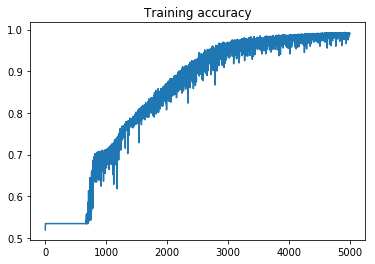

In [136]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(acc_data)
plt.title('Training accuracy')
plt.show()

**me:** So, once the model has been trained, it's fizz buzz time. Our input should just be the binary encoding of the numbers 1 to 100:

In [137]:
numbers = np.arange(1, 101)
teX = np.transpose(binary_encode(numbers, NUM_DIGITS))

And then our output is just our `fizz_buzz` function applied to the model output:



In [138]:
teY = sess.run(predict_op, feed_dict={X: teX})
output = np.vectorize(fizz_buzz)(numbers, teY)

**interviewer:** ...

**me:** And that should be your fizz buzz!

**interviewer:** Really, that's enough. We'll be in touch.

**me:** In touch, that sounds promising.

**interviewer: ...**

## Postscript

I didn't get the job. It turns out it got some of the outputs wrong! Thanks a lot, machine learning.

In [139]:
actuals = [fizz_buzz(i, fizz_buzz_encode(i).argmax()) for i in numbers]
correct = 0
wrong = 0

for i, (predicted, actual) in enumerate(zip(output, actuals)):
    if predicted != actual:
        wrong += 1
        print("{0} {1} {2}".format(i+1, predicted, actual))
    else:
        correct += 1
if(wrong + correct == allRes):
    print("Test accuracy: {0}%".format(correct/(correct+wrong)))
else:
    print("Smth wrong")

12 nothing fizz
72 nothing fizz
Test accuracy: 0.98%


I guess maybe I should have used a deeper network.